<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Yulu%20Hypothesis%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

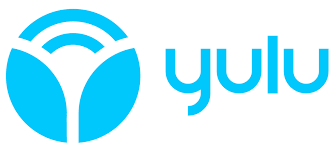

* Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
* Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

# **Business Problem**

Determine factors affecting the demand for these shared electric cycles in the Indian market

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

# **Desired Outcome of Analysis**

* Statistically Determine the Significant variable effecting the Demand of Shared Elctric Cycle in Indian Market
** 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)
** ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
** Chi-square test to check if Weather is dependent on the season (10 points)







# **Loading Modules and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, binom, geom

from scipy.stats import ttest_1samp, ttest_ind,ttest_rel

from scipy.stats import chisquare,chi2,chi2_contingency

from scipy.stats import f_oneway,kruskal,shapiro,levene
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import pearsonr,spearmanr

from scipy.stats import poisson,expon

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv")

# **Basic Metric Analysis & Data type Coversion**

In [5]:
data.shape

(10886, 12)

In [6]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=10886, step=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Let us change name of some of the columns as per given description
* check if count = Casual + Registered & change "count" --> "total_count"
* "atemp" --> "feeling_temp"

In [10]:
np.all(data["count"] == data["registered"] + data["casual"])

True

In [11]:
data.rename({"count":"total_count"},axis=1,inplace= True)

In [12]:
data.rename({"atemp":"feeling_temp"},axis=1,inplace= True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      10886 non-null  object 
 1   season        10886 non-null  int64  
 2   holiday       10886 non-null  int64  
 3   workingday    10886 non-null  int64  
 4   weather       10886 non-null  int64  
 5   temp          10886 non-null  float64
 6   feeling_temp  10886 non-null  float64
 7   humidity      10886 non-null  int64  
 8   windspeed     10886 non-null  float64
 9   casual        10886 non-null  int64  
 10  registered    10886 non-null  int64  
 11  total_count   10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* season, weather, holiday, workingday columns have Dtype as "int64", lets convert them to "Category" as they are categorical data
* Also We will convert "datetime" Column Dtype to "datetime64[ns]"


In [14]:
data["datetime"]=data["datetime"].astype("datetime64[ns]")
data["season"]=data["season"].astype("category")
data["weather"]=data["weather"].astype("category")
data['holiday']=data['holiday'].astype("category")
data["workingday"]=data["workingday"].astype("category")

In [15]:
data.dtypes

datetime        datetime64[ns]
season                category
holiday               category
workingday            category
weather               category
temp                   float64
feeling_temp           float64
humidity                 int64
windspeed              float64
casual                   int64
registered               int64
total_count              int64
dtype: object

* season, weather, holiday, workingday columns : dtype have been changed to "category"
* datatime column : Dtype changed to datetime64[ns]

In [16]:
# Checking count of Unique values of Each Column
data.nunique()

datetime        10886
season              4
holiday             2
workingday          2
weather             4
temp               49
feeling_temp       60
humidity           89
windspeed          28
casual            309
registered        731
total_count       822
dtype: int64

In [17]:
data.describe()

,temp,feeling_temp,humidity,windspeed,casual,registered,total_count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [18]:
for i in data.columns:
  print(data[i].value_counts(normalize= True).sort_values(ascending =False))
  print("-------------------------------------")

2011-01-01 00:00:00    0.000092
2011-01-01 07:00:00    0.000092
2011-01-01 21:00:00    0.000092
2011-01-01 20:00:00    0.000092
2011-01-01 19:00:00    0.000092
                         ...   
2012-12-19 18:00:00    0.000092
2012-12-19 19:00:00    0.000092
2012-12-19 20:00:00    0.000092
2012-12-19 21:00:00    0.000092
2012-12-19 23:00:00    0.000092
Name: datetime, Length: 10886, dtype: float64
-------------------------------------
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64
-------------------------------------
0    0.971431
1    0.028569
Name: holiday, dtype: float64
-------------------------------------
1    0.680875
0    0.319125
Name: workingday, dtype: float64
-------------------------------------
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64
-------------------------------------
14.76    0.042899
26.24    0.041613
28.70    0.039225
13.94    0.037939
18.86    0.037296
22.14    0.037020
25.42    0.037

* Dataset is collected between 1st Jan 2011 to  19th Dec 2012
* Dataset has recording collected in all 4 Seasons & Weathers
* Data set has recording collectd in Workingdays & Holidays
* Temperature's range from 0.82 ~ 41.0
* But Tempeture felt ranged between 0.76 ~ 45.45
* Humidity range from 0 ~ 100 & Wind speed from 0 ~ 56.99
* Casual Booking minimmum is "0" & Maximum are 367 per day
* Registered Booking minimum is 0  & Maximum are 886 per day
* Overall Total Booking Count ranged from 1 ~ 977 per day
* from Mean - Median analysis of Casual, Registered & Total booking count : We can say definitely some Unusual bookings observed some days[Outliers]

# **Data Cleaning - Duplicates,Null Values & Outliers**

## Duplicates

In [19]:
data.duplicated().sum()

0

In [20]:
data.drop_duplicates(inplace= True)

No Duplicates Rows Found

## Null Values

In [21]:
data.isna().sum(axis=0)

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp            0
feeling_temp    0
humidity        0
windspeed       0
casual          0
registered      0
total_count     0
dtype: int64

No "NAN" found in Data

## Outliers - Visualization using Box Plot & Numerically using IQR

* Outliers can be found in Casual, registered & total_count Columns
* We will visualize the outliers using boxplot
* we will get all parameter of a box plot using user defined function --> "boxplotallparameter(x)"

In [22]:
# Userdefined function to get all statistical parameter including upper & lower limit values of a given column : "x"
# "x" --> Any Numerical Series
def boxplotallparameter(x):
  IQR = np.percentile(x,75) - np.percentile(x,25)
  lower_limit = max (np.percentile(x,25) - 1.5*IQR,0)
  upper_limit = np.percentile(x,75) + 1.5*IQR
  print("Minimum:",min(x))
  print("Lower_Limit:",lower_limit)
  print("Quantile25:",np.percentile(x,25))
  print("Median:",np.percentile(x,50))
  print("Quantile75:",np.percentile(x,75))
  print("Upper_Limit:",upper_limit)
  print("Maximum:",max(x))

### casual

<Axes: ylabel='casual'>

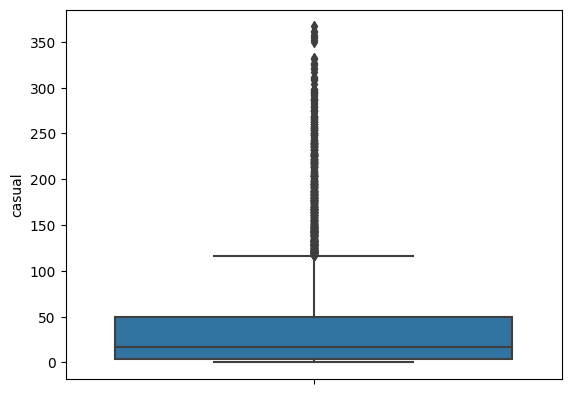

In [23]:
sns.boxplot(data= data, y= "casual")

In [24]:
boxplotallparameter(data["casual"])

Minimum: 0
Lower_Limit: 0
Quantile25: 4.0
Median: 17.0
Quantile75: 49.0
Upper_Limit: 116.5
Maximum: 367


* casual user per day range between 0 to 116, however there are some unsual booking some days ranging from 117 to 367 per day


### registered

<Axes: ylabel='registered'>

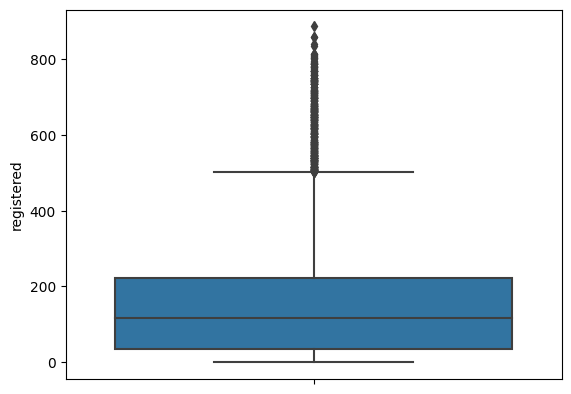

In [25]:
sns.boxplot(data= data, y= 'registered')

In [26]:
boxplotallparameter(data['registered'])

Minimum: 0
Lower_Limit: 0
Quantile25: 36.0
Median: 118.0
Quantile75: 222.0
Upper_Limit: 501.0
Maximum: 886


* registered user per day range between 0 to 501, however there are some unsual booking some days ranging from 502 to 886 per day

### total_count

<Axes: ylabel='total_count'>

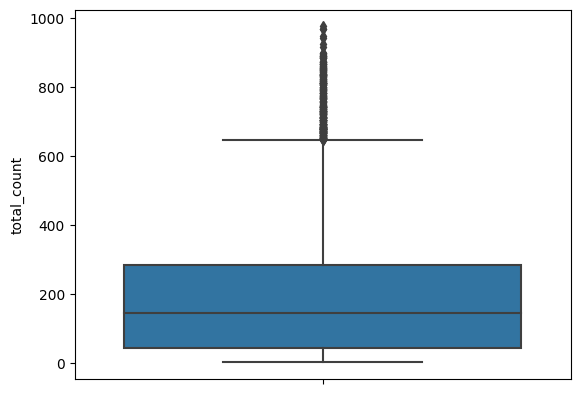

In [27]:
sns.boxplot(data= data,y= "total_count")

In [28]:
boxplotallparameter(data["total_count"])

Minimum: 1
Lower_Limit: 0
Quantile25: 42.0
Median: 145.0
Quantile75: 284.0
Upper_Limit: 647.0
Maximum: 977


* total_count of user per day range between 0 to 647, however there are some unsual booking some days ranging from 648 to 977 per day

# **Correlation among Data**

In [29]:
data.corr()

<ipython-input-29-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,temp,feeling_temp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
feeling_temp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
total_count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<ipython-input-30-48d00ee6b6e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap = "Greens")


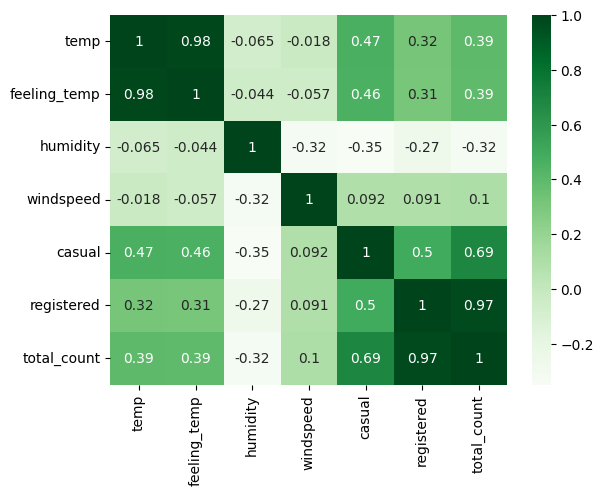

In [30]:
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

All Numeric Features are least Correlated

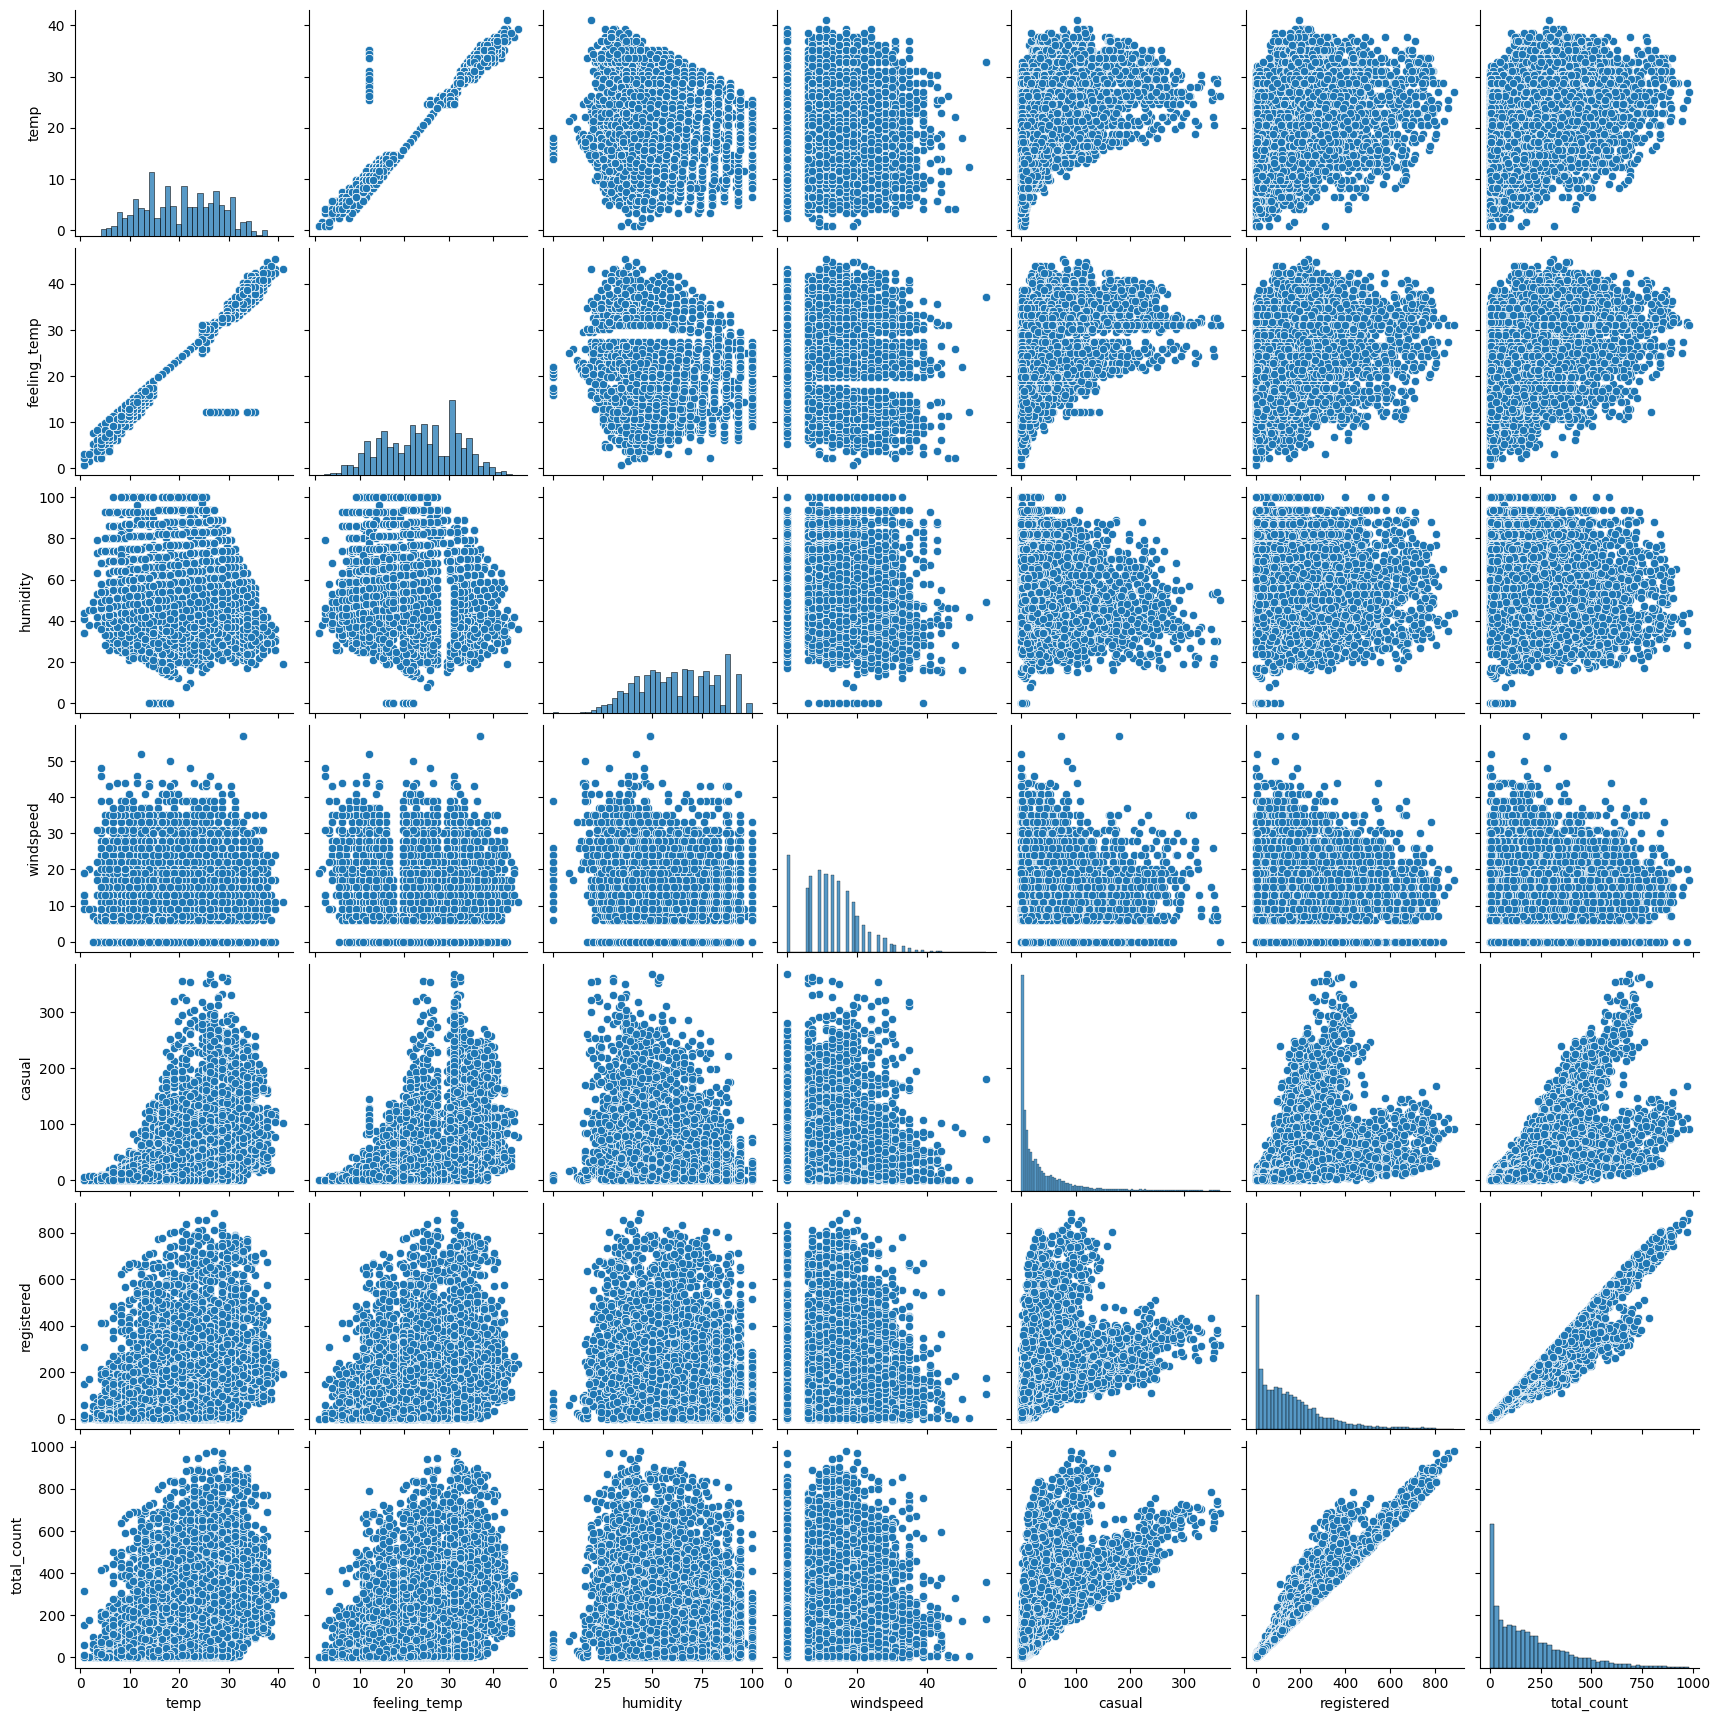

In [ ]:
sns.pairplot(data)


* Very good Correlation between Temp & feeling_Temp [0.98]
* Very good correlation observed between Registered & total_count [0.97]
* As total_count increase, the distribution range of casual increase [0.69]
* Casual user count has good correation with temp [0.47]
* Temperature/feeling_temp have some what correlation with Registered[0.32] & total_count[0.39]


# **UniVariate, Bivariate Analysis**

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'feeling_temp', 'humidity', 'windspeed', 'casual', 'registered',
       'total_count'],
      dtype='object')

## Season



In [31]:
data['season'].value_counts(normalize = True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

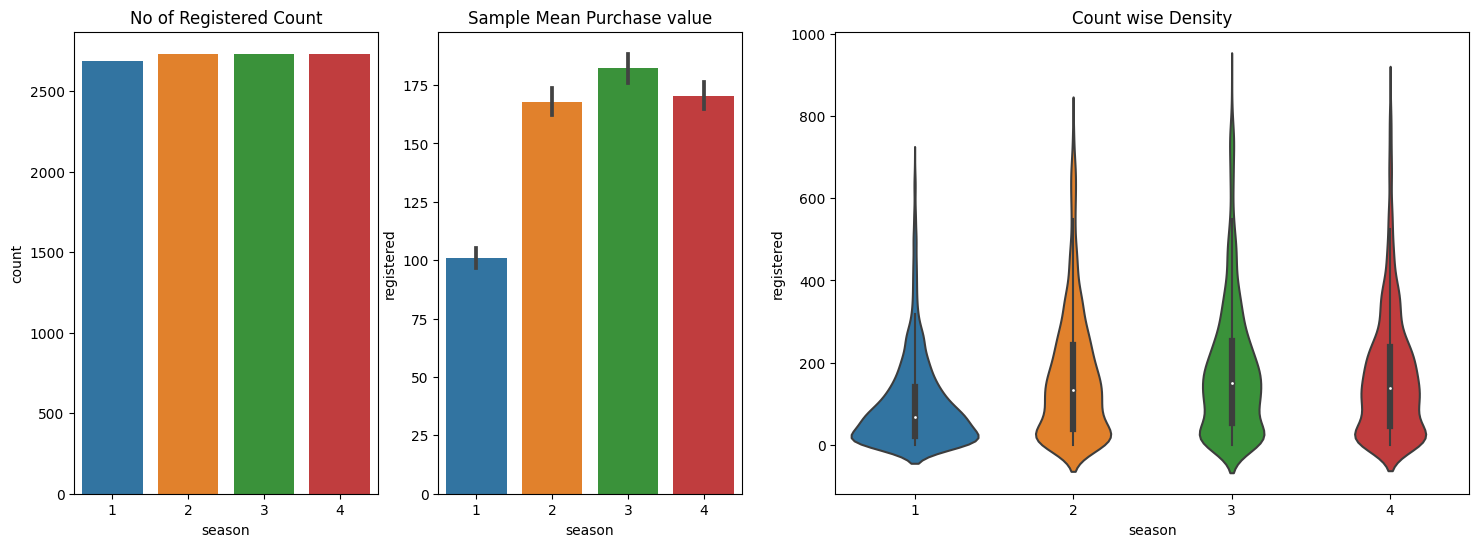

In [35]:
plt.figure(figsize = (18,6))
plt.subplot(1,4,1)
plt.title("No of Registered Count")
sns.countplot(data=data,x='season')
plt.subplot(1,2,2)
plt.title("Count wise Density")
sns.violinplot(data=data,y="registered",x = "season")
plt.subplot(1,4,2)
plt.title("Sample Mean Purchase value")
sns.barplot(data=data,y="registered",x = "season", estimator = "mean")
plt.show

* 75% of purchased are made by Male Customers
* Avg Purchase value of male Customers is more than Female Customers


## Outliers - Using IQR Analysis

In [ ]:
# Finding outlier for Purchase values for each feature and its values
x ="Purchase"
for z in ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']:
  for y in data[z].value_counts().index:
    outlierlist=[]
    datai = data[data[z] == y]
    print(z,"-", y,"Group")
    print("*******************************************************************")
    IQR = np.percentile(datai[x],75) - np.percentile(datai[x],25)
    lower_limit = max (np.percentile(datai[x],25) - 1.5*IQR,0)
    upper_limit = np.percentile(datai[x],75) + 1.5*IQR
    outlierlist.extend(list(np.where( (datai[x]>upper_limit) | (datai[x]<lower_limit) )[0]))
    print("IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit")
    print( IQR,",",lower_limit,",",np.percentile(datai[x],25),",",np.percentile(datai[x],75),",",upper_limit)
    print()
    print("Out of ",len(datai), "Data points , There are",len(outlierlist),"Outliers")
    print()
    print("*******************************************************************")




Outliers have been identified for all the required Categories, later on while doing analysis for  population mean for each category, we wiil drop outliers

## Age

In [ ]:
data["Age"].value_counts(normalize = True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

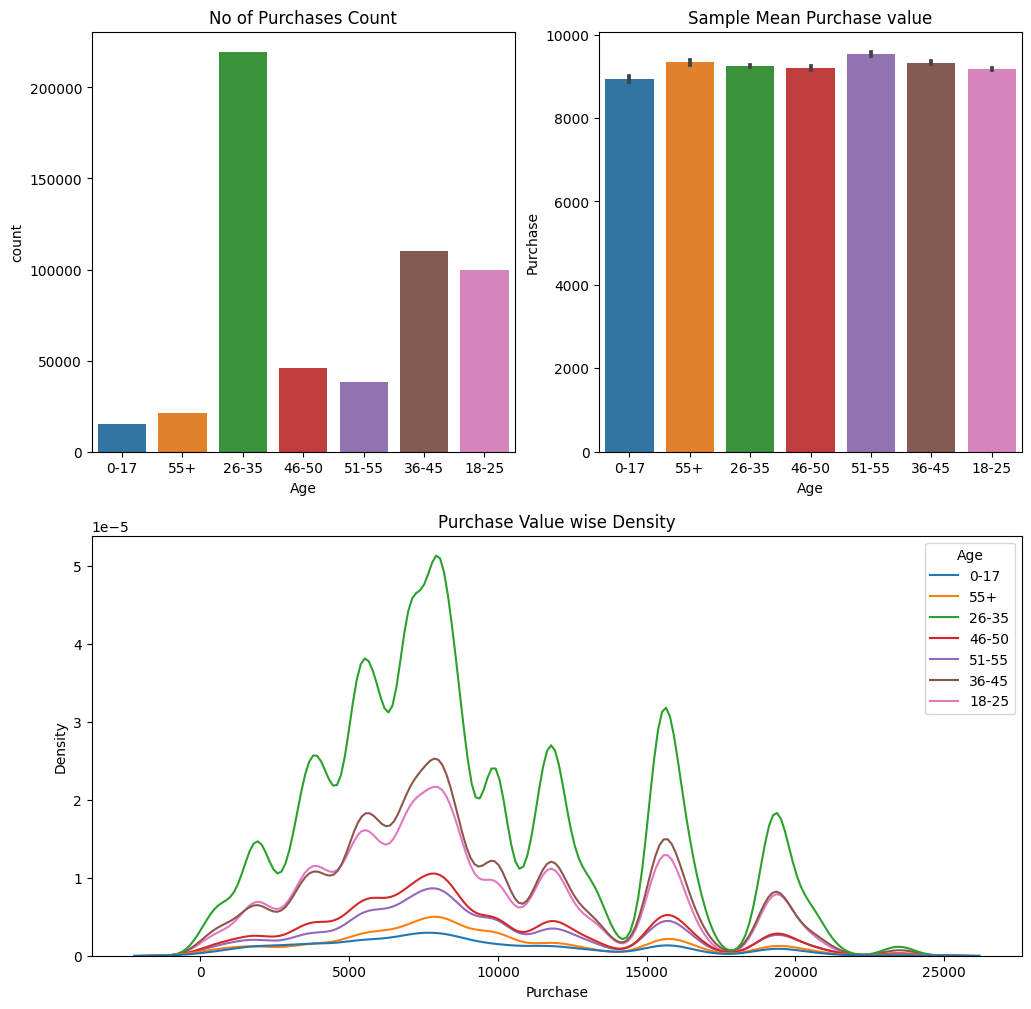

In [ ]:
plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
plt.title("No of Purchases Count")
sns.countplot(data=data,x="Age")
plt.subplot(2,1,2)
plt.title("Purchase Value wise Density")
sns.kdeplot(data=data,x="Purchase",hue = "Age")
plt.subplot(2,2,2)
plt.title("Sample Mean Purchase value")
sns.barplot(data=data,y="Purchase",x = "Age", estimator = "mean")
plt.show

* 40% Purchases of customer are of age group 26-35
* 20% Purchases of cutomers are of age group 36-45
* 18% Purchases of cutomers are of age group 18-25

* Avg Purchase values is Highest for Age group = 51-55
* Avg Purchase values is least for age Group = 0-17

## Marital_Status

In [ ]:
data["Marital_Status"].value_counts(normalize = True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

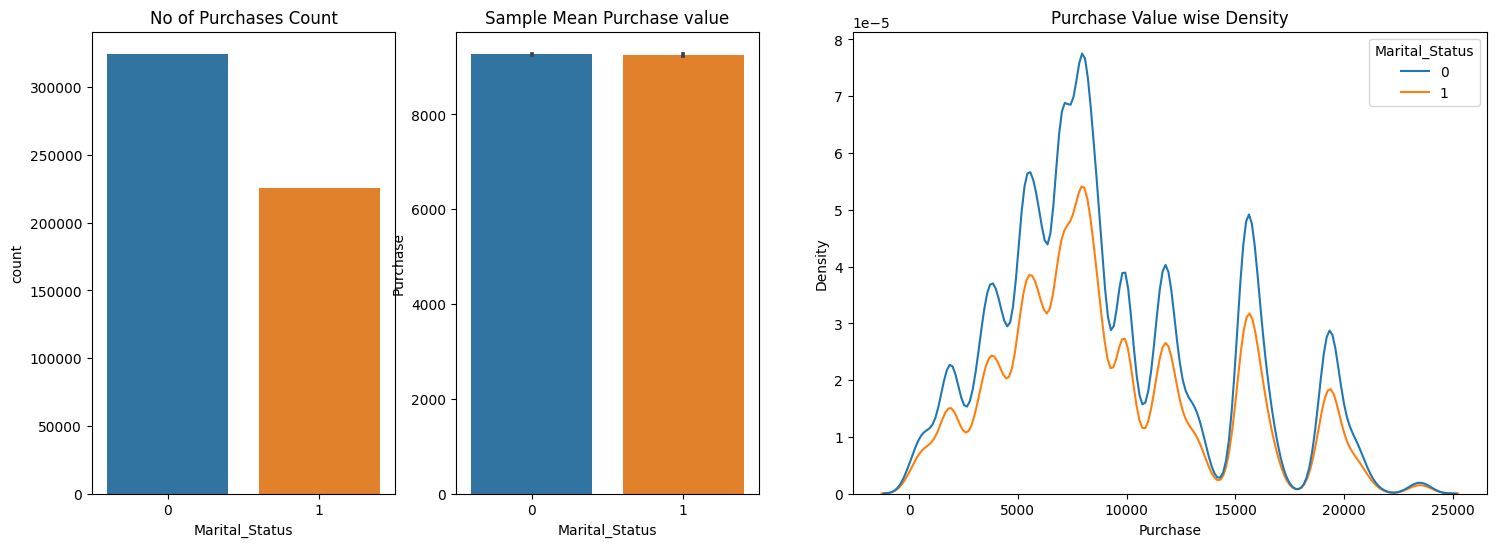

In [ ]:
plt.figure(figsize = (18,6))
plt.subplot(1,4,1)
plt.title("No of Purchases Count")
sns.countplot(data=data,x="Marital_Status")
plt.subplot(1,2,2)
plt.title("Purchase Value wise Density")
sns.kdeplot(data=data,x="Purchase",hue = "Marital_Status")
plt.subplot(1,4,2)
plt.title("Sample Mean Purchase value")
sns.barplot(data=data,y="Purchase",x = "Marital_Status", estimator = "mean")
plt.show

* 60% Purchase made by Marital_Status:"0"
* Average purchase value is almost same for both Singles & Married
* Purchase Value density is almost same for both Singles & Married

## City_Category

In [ ]:
data["City_Category"].value_counts(normalize = True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

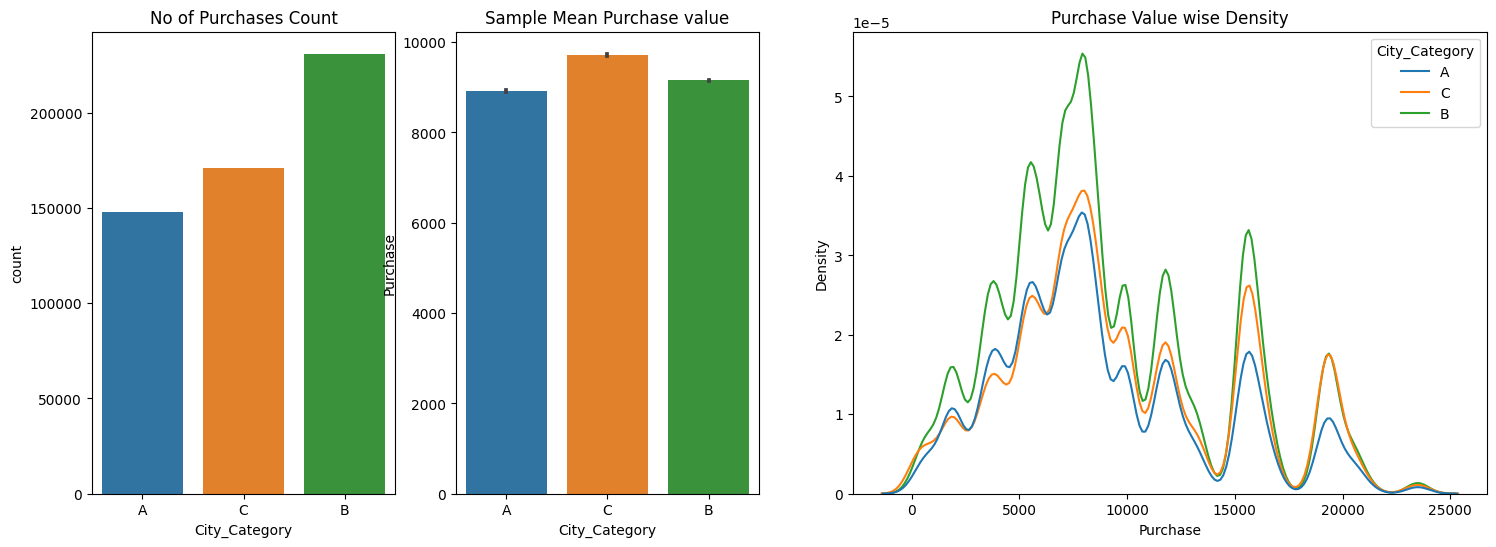

In [ ]:
plt.figure(figsize = (18,6))
plt.subplot(1,4,1)
plt.title("No of Purchases Count")
sns.countplot(data=data,x="City_Category")
plt.subplot(1,2,2)
plt.title("Purchase Value wise Density")
sns.kdeplot(data=data,x="Purchase",hue = "City_Category")
plt.subplot(1,4,2)
plt.title("Sample Mean Purchase value")
sns.barplot(data=data,y="Purchase",x = "City_Category", estimator = "mean")
plt.show

* Purchase Value density is almost same in all Cities Customers as seen in violin plot
* However Most Purchases are made by "B" City Customers
* But Mean Purchase Value is Highest for "C" City Customers

## Stay_In_Current_City_Years

In [ ]:
data["Stay_In_Current_City_Years"].value_counts(normalize = True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

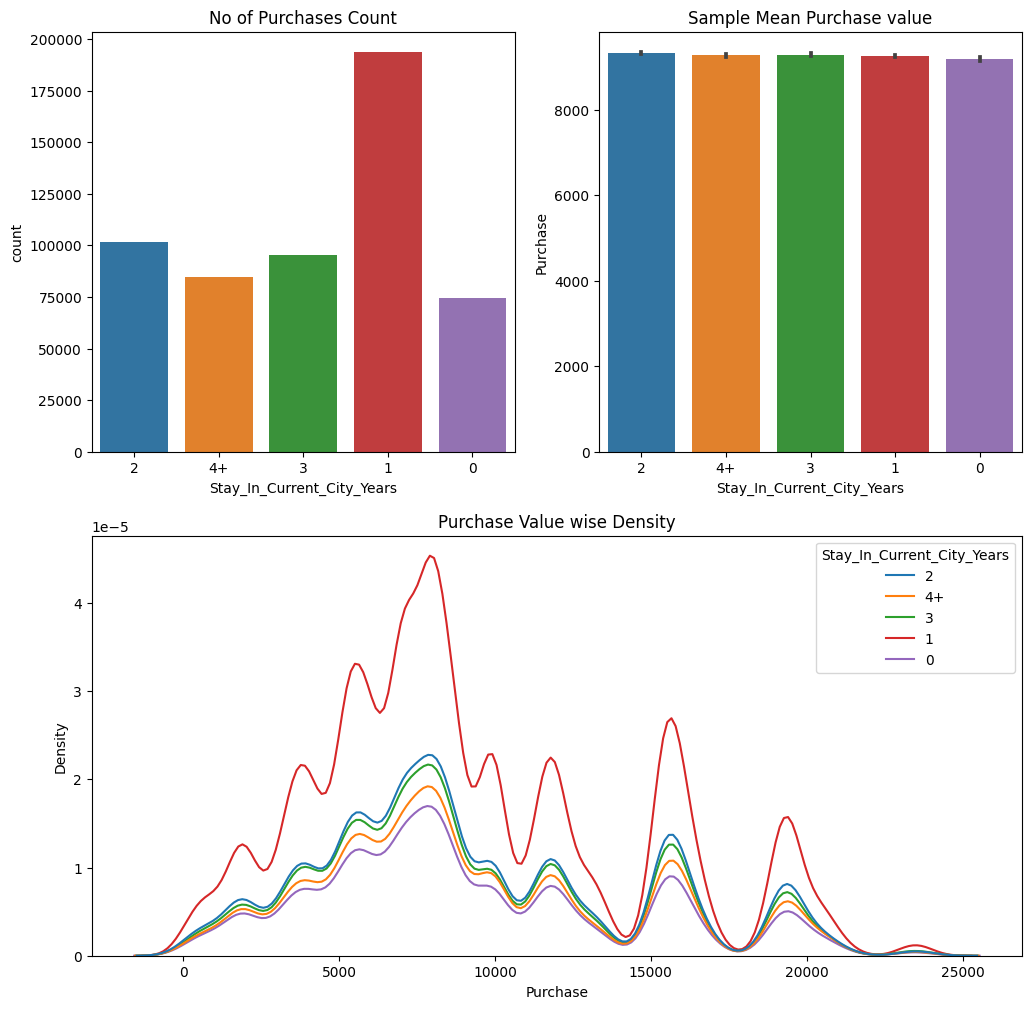

In [ ]:
plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
plt.title("No of Purchases Count")
sns.countplot(data=data,x="Stay_In_Current_City_Years")
plt.subplot(2,1,2)
plt.title("Purchase Value wise Density")
sns.kdeplot(data=data,x="Purchase",hue = "Stay_In_Current_City_Years")
plt.subplot(2,2,2)
plt.title("Sample Mean Purchase value")
sns.barplot(data=data,y="Purchase",x = "Stay_In_Current_City_Years", estimator = "mean")
plt.show

* Purchase Value Proportion is almost same with respect to Stay in Current City Years
* However Most Purchases are made by Customers who stayed for "1" year
* Mean Purchase Value is almost same with respect to Stay in Current City Years


# **Mean Purchase Values & Confidence Interval**

## Custom Function: To Calculate Confidence interval

In [ ]:
# Function for Finding Confidence Interval(CI) from given sample data - "data" using CLT with sample bin size - "n" , No of sample bins - "m" , Confidence Interval - "perct"
# This Function return tuple of 3 Values - CI lower limit, Mean, CI Upper Limit of given data

# data = sample Dataset(Numerical Series Datatype)
# n = Sample bin size for mean calculation >=30 (int)
# m = No of Sample bins for mean distribution (int)
# perct = Confidence interval Percentage (float)
def Confidence_Interval(data,n,m,perct):
   sample_mean_n = [np.mean(data.sample(n)) for i in range(m)]

   Mean_of_samples_Mean = np.mean(sample_mean_n)
   sd_of_samples_Mean = np.std(sample_mean_n)

   std_error = sd_of_samples_Mean / np.sqrt(n)
   x1 = Mean_of_samples_Mean + (std_error * norm.ppf((100-perct)/200))
   x2 = Mean_of_samples_Mean + (std_error * norm.ppf(1 - ((100-perct)/200)))
   return round(x1),round(Mean_of_samples_Mean),round(x2)


## Experimenting to Finalize Sample Bin Size & No of samples

First lets understand what should be our sample bin size and how many such samples should be taken for calculating out Population mean using CLT :- By doing some experiments on single attribute - Gender:M for parameter optimization

In [ ]:
datai = data[data["Gender"] == "M"]
datai.shape[0]

414259

In [ ]:
# Removing outlier from Gender-M data

outlierlist=[]
IQR = np.percentile(datai["Purchase"],75) - np.percentile(datai["Purchase"],25)
lower_limit = max (np.percentile(datai["Purchase"],25) - 1.5*IQR,0)
upper_limit = np.percentile(datai["Purchase"],75) + 1.5*IQR
outlierlist = list(np.where( (datai["Purchase"]>upper_limit) | (datai["Purchase"]<lower_limit) )[0])
datai = datai.reset_index()
datai.drop(outlierlist,inplace=True)

datai.shape[0]

412447

* Now "datai" has all its outliers dropped,we will use it for our parameter optimization experiment

In [ ]:
#output: Lower_limit,Mean_value,Upper_limit
print(Confidence_Interval(data= datai["Purchase"],n=100,m=20000,perct=99))

(9243, 9373, 9502)


In [ ]:
#output: Lower_limit,Mean_value,Upper_limit
print(Confidence_Interval(data= datai["Purchase"],n=100,m=10000,perct=99))

(9253, 9383, 9513)


In [ ]:
#output: Lower_limit,Mean_value,Upper_limit
print(Confidence_Interval(data= datai["Purchase"],n=100,m=5000,perct=99))

(9244, 9374, 9505)


In [ ]:
#output: Lower_limit,Mean_value,Upper_limit
print(Confidence_Interval(data= datai["Purchase"],n=200,m=5000,perct=99))

(9306, 9370, 9434)


In [ ]:
#output: Lower_limit,Mean_value,Upper_limit
print(Confidence_Interval(data= datai["Purchase"],n=50,m=5000,perct=99))

(9105, 9365, 9625)


In [ ]:
#output: Lower_limit,Mean_value,Upper_limit
print(Confidence_Interval(data= datai["Purchase"],n=40,m=5000,perct=99))

(9035, 9360, 9685)


In [ ]:
#output: Lower_limit,Mean_value,Upper_limit
print(Confidence_Interval(data= datai["Purchase"],n=30,m=5000,perct=99))

(8932, 9362, 9792)



* n = Sample bin size for mean calculation , at n = 100 is sufficient to get most optimised interval results
* m = No of Sample bins, at m = 5000 we are best accurate result possible

## Attribute Wise : Population Mean & 99% Confidence Interval

*********************************************************************************
Gender Attribute Population - Mean & 99% Confidence Interval
*********************************************************************************
-------------------------------------------------------------------
Gender - M Group

Mean Purchase value : 9381
99% Confidence Interval : 9254 ~ 9508
-------------------------------------------------------------------
Gender - F Group

Mean Purchase value : 8535
99% Confidence Interval : 8417 ~ 8653
-------------------------------------------------------------------


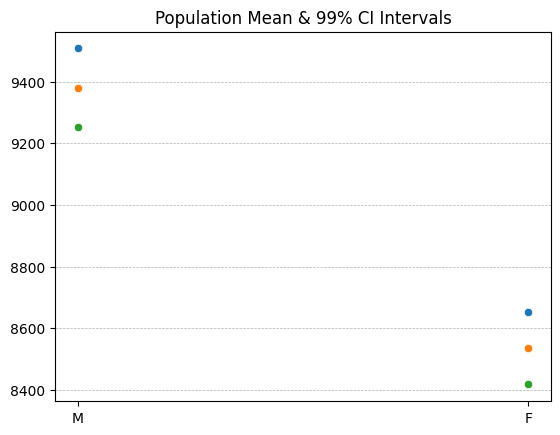

*********************************************************************************
Age Attribute Population - Mean & 99% Confidence Interval
*********************************************************************************
-------------------------------------------------------------------
Age - 26-35 Group

Mean Purchase value : 9200
99% Confidence Interval : 9074 ~ 9326
-------------------------------------------------------------------
Age - 36-45 Group

Mean Purchase value : 9263
99% Confidence Interval : 9137 ~ 9389
-------------------------------------------------------------------
Age - 18-25 Group

Mean Purchase value : 9130
99% Confidence Interval : 9003 ~ 9256
-------------------------------------------------------------------
Age - 46-50 Group

Mean Purchase value : 9116
99% Confidence Interval : 8991 ~ 9242
-------------------------------------------------------------------
Age - 51-55 Group

Mean Purchase value : 9435
99% Confidence Interval : 9308 ~ 9563
------------------

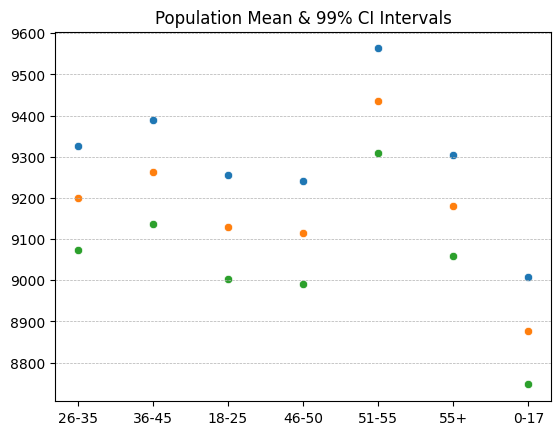

*********************************************************************************
Marital_Status Attribute Population - Mean & 99% Confidence Interval
*********************************************************************************
-------------------------------------------------------------------
Marital_Status - 0 Group

Mean Purchase value : 9204
99% Confidence Interval : 9075 ~ 9332
-------------------------------------------------------------------
Marital_Status - 1 Group

Mean Purchase value : 9190
99% Confidence Interval : 9063 ~ 9317
-------------------------------------------------------------------


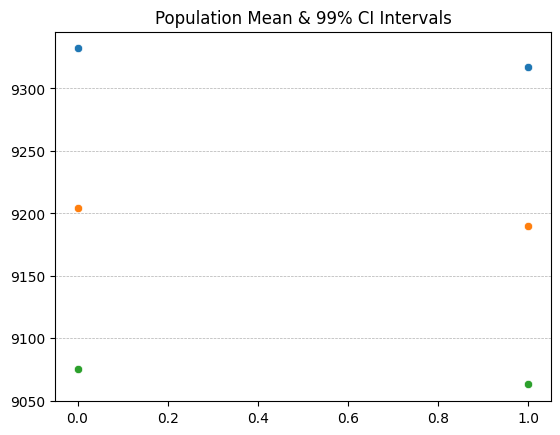

*********************************************************************************
City_Category Attribute Population - Mean & 99% Confidence Interval
*********************************************************************************
-------------------------------------------------------------------
City_Category - B Group

Mean Purchase value : 9101
99% Confidence Interval : 8976 ~ 9226
-------------------------------------------------------------------
City_Category - C Group

Mean Purchase value : 9714
99% Confidence Interval : 9580 ~ 9847
-------------------------------------------------------------------
City_Category - A Group

Mean Purchase value : 8850
99% Confidence Interval : 8726 ~ 8974
-------------------------------------------------------------------


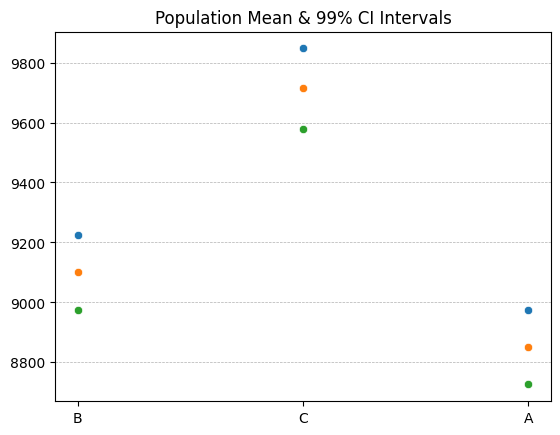

*********************************************************************************
Stay_In_Current_City_Years Attribute Population - Mean & 99% Confidence Interval
*********************************************************************************
-------------------------------------------------------------------
Stay_In_Current_City_Years - 1 Group

Mean Purchase value : 9179
99% Confidence Interval : 9052 ~ 9307
-------------------------------------------------------------------
Stay_In_Current_City_Years - 2 Group

Mean Purchase value : 9281
99% Confidence Interval : 9152 ~ 9410
-------------------------------------------------------------------
Stay_In_Current_City_Years - 3 Group

Mean Purchase value : 9220
99% Confidence Interval : 9094 ~ 9346
-------------------------------------------------------------------
Stay_In_Current_City_Years - 4+ Group

Mean Purchase value : 9218
99% Confidence Interval : 9090 ~ 9345
-------------------------------------------------------------------
St

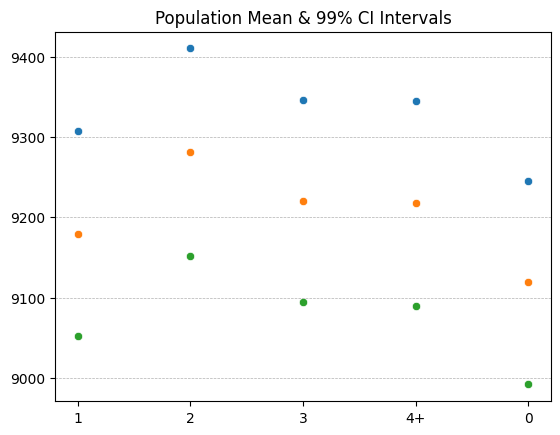

*********************************************************************************


In [ ]:
# Below Code is for removing the outliers using IQR & finding the 99% Confidence interval for each Attribute
print("*********************************************************************************")
for z in ['Gender', 'Age', 'Marital_Status', 'City_Category','Stay_In_Current_City_Years']:
  X = []
  U = []
  L = []
  M = []
  print(z,"Attribute Population - Mean & 99% Confidence Interval")
  print("*********************************************************************************")
  for y in data[z].value_counts().index:
    outlierlist=[]
    datai = data[data[z] == y]
    print("-------------------------------------------------------------------")
    print(z,"-", y,"Group")
    print()
    IQR = np.percentile(datai["Purchase"],75) - np.percentile(datai["Purchase"],25)
    lower_limit = max (np.percentile(datai["Purchase"],25) - 1.5*IQR,0)
    upper_limit = np.percentile(datai["Purchase"],75) + 1.5*IQR
    outlierlist = list(np.where( (datai["Purchase"]>upper_limit) | (datai["Purchase"]<lower_limit) )[0])
    datai = datai.reset_index()
    datai.drop(outlierlist,inplace=True)
    Lower_limit,Mean_value,Upper_limit = Confidence_Interval(data= datai["Purchase"],n=100,m=5000,perct=99)
    print("Mean Purchase value :",Mean_value)
    print("99% Confidence Interval :",Lower_limit,"~",Upper_limit )
    X.append(y)
    U.append(Upper_limit)
    M.append(Mean_value)
    L.append(Lower_limit)
  print("-------------------------------------------------------------------")
  plt.figurefigsize=(6,4)
  plt.title("Population Mean & 99% CI Intervals" )
  sns.scatterplot( x= X, y=U)
  sns.scatterplot( x= X, y=M)
  sns.scatterplot( x= X, y=L)
  plt.grid(linestyle = '--', linewidth = 0.5,axis="y")
  plt.show()
  print("*********************************************************************************")


Gender:

* Mean Purchase value of Male Customers is higher than Female
* There is no overlapping of Male & Female Population mean

Age

* Highest Mean Purchase value is of 51-55 group
* Lowest Mean Purchase values is of 0-17 group
* There is some overlapping of Purchase value across all age groups

Marital_Status

* Mean Purchase value of Married & Unmarried is almost same
* There is huge overlapping of Married & Unmarried Population mean Purchase value

City_Category

* Customer in City - C Category has highest mean purchase value
* Customer in City - A Category has Least Mean Purchase Value
* There is no Overlap in Confidence intervals as per city Cateogory

Stay_In_Current_City_Years

* Customers whose stay in Current City is 2 has highest Mean Purchase value
* Customers with stay in Current City : 0 has least Mean Purchase Value
* However there is huge overlap in Confidence intervals


# **Bussiness Insights**

**Gender**
* 75% of purchased are made by Male Customers
* Mean Purchase value of Male Customers is very high than Female
* There is no overlapping of Male & Female Population mean Purchase Value
* Male Customers are More leaned towards higher spending in the range of 12000 ~ 20000, so this point can be kept in mind by sales excecutive while upselling products/ marketing premium products



**Age**

* 40% Purchases of customer are of group 26-35 [Highest]
* 2.7% Purchases of Customer are of group 0- 17 [Lowest]
* Highest Mean Purchase value is of 51-55 group , but this group constitutes only 6.9% of all
* Mean purchase value of 26-35 ,36-45 & 55+ is almost same & are having 2nd highest Mean Purchase value, these 3 group constitutes of 64 % of all
* Lowest Mean Purchase values is of 0-17 group
* Mean purchase value of 18-25, 46-50 is almost same also Huge overlap of Confidence Interval & are having 2nd least Mean Purchase value ,but these 2 group constitutes  26 % of all
* 18-25,26-35,36-45 Groups more leaned towards higher spending in the range of 15000 ~ 20000

**Marital_Status**
* 60% Purchase made by Marital_Status:"0"
* Purchase Value density pattern is almost same for both Singles & Married, however Marital_Status:"0" more leaned towards higher spending in the range of 15000 ~ 20000
* Mean Purchase value of Married & Unmarried is almost same
* There is huge overlapping of Married & Unmarried Population mean Purchase value
* from which we can infer , marital_status has very minimal effect on Purchase values, how ever Statistical test can be used to confirm it further

**City_Category**
* Most Purchases are made by "B" City Category Customers & Least are made by "A" City Category Customers
* But Customer in City - C Category has highest mean purchase value
* and Customer in City - A Category has Least Mean Purchase Value
* There is No overlap in Confidence interval among all 3 City Cateogory Mean Purchase Values
* C & B City Category Customers more leaned towards higher spending in the range of 15000 ~ 20000
* Sales Exceutives can Sell the products as per the Purchase values in Each category

**Stay_In_Current_City_Years**
* Purchase Value density pattern is almost same across all groups with respect to Stay in Current City
* However Most Purchases are made by Customers who stayed for "1" year & Least Purchase are made by Customer who Stayed "0" years

* Customers whose stay in Current City is 2 has highest Mean Purchase value
* Customers with stay in Current City : 0 has least Mean Purchase Value
* There is huge overlap in Confidence intervals
* we can infer effect of Stay in Current City is also minimal
* High purchase customers are the one whose stay in city is 1, but their mean purchase value is 100 units less the highest - based on the Stay in Current City year/ long term Association with Walamrt, walmart should give promotional discount to attract New Comers in the city & Very old Customers in the city

# **Recommendations**

**Gender**
* Male Customers are More leaned towards higher spending in the range of 12000 ~ 20000, so this point can be kept in mind by sales excecutive while upselling products/ marketing premium product
* Additional Offers to be provided for Female Customer to increase the High value Purchases







**Age**
* 0- 17 Age Customer Purchase is Very Low, sales value of this group can be increased by giving gift coupons as per purchase value & these Gift Coupons can be used only in Walmart Play zone[Play Zone Have to be developed]
* More Upselling can be done to 18-25,26-35,36-45 as they are more prone to make purchase value ranging 15000~20000
* Purchase value based discounts to be Given to 18-25,26-35,36-45,46-50 & 55+age Groups to increase the Purchase value of these groups


**Marital_Status**
* Married customers should be given be Couple friendly Gift to Increase Purchase Value


**City_Category**
* High priced /Premium products market Introduction can be done with C-City Category Customers as a start as they are more prone to purchase value of 15000 ~ 20000
* Giving Sales Discount will increase A & B - City Category Customers purchase value
* Upselling can be done with B - Cateogory Customers along with C-City Category Customers


**Stay_In_Current_City_Years**
* High purchase customers are the one whose stay in city is 1, but their mean purchase value is 100 units less the highest - based on the Stay in Current City year/ long term Association with Walamrt, walmart should give promotional discount to attract New Comers in the city & Very old Customers in the city